Importing libraries

In [ ]:
# import required modules
import keras
import keras.utils
# from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers.core import Dropout
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1,l2
from keras.initializers import glorot_uniform

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.models import load_model
import seaborn as sns

In [ ]:
# Importing libraries for DenseNet model
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense, SeparableConv2D, ZeroPadding2D, Add
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, AveragePooling2D, GlobalAvgPool2D, MaxPool2D, MaxPooling2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.utils.vis_utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gen1 = ImageDataGenerator(rescale=1/255)

In [ ]:
t_data = gen1.flow_from_directory('/content/drive/MyDrive/Data_New/Train_augmented', target_size = (299,299), batch_size = 16, class_mode = 'categorical', shuffle = True, color_mode = 'rgb')

Found 3000 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


In [ ]:
len(t_data)

188

In [ ]:
# Extracting all train data in X1, y1 variables by iterating over the batches
t_data.reset()
X1, y1 = next(t_data) # First batch is fetched now
for i in range(0,187): #1st batch is already fetched before the for loop. length of train_dataset is 94. So running loop till 93.
  img, label = next(t_data)
  X1 = np.append(X1, img, axis=0 )
  y1 = np.append(y1, label, axis=0)
print(X1.shape, y1.shape)

(3000, 299, 299, 3) (3000, 3)


In [ ]:
X1_train, X1_validation, y1_train, y1_validation = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
# Test data for xception is shuffled: 
#(If unshuffled: First 130 images are ALL, next 130 are AML and last 130 are Healthy)
test_x = gen1.flow_from_directory('/content/drive/MyDrive/Data_New/Test', target_size = (299,299), batch_size = 16, class_mode = 'categorical',classes = ["ALL","AML","Healthy"], shuffle = True, color_mode = 'rgb')

Found 390 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


In [ ]:
len(test_x)

25

In [ ]:
# Storing all test_x data in X1_test, y1_test variables by iterating over the batches
test_x.reset()
X1_test, y1_test = next(test_x) # First batch is fetched now
for i in range(0,24): #1st batch is already fetched before the for loop. length of test_dataset is 13. So running loop for 12 batches.
  img, label = next(test_x)
  X1_test = np.append(X1_test, img, axis=0 )
  y1_test = np.append(y1_test, label, axis=0)
print(X1_test.shape, y1_test.shape)

(390, 299, 299, 3) (390, 3)


In [ ]:
y1_test_classes = [np.argmax(element) for element in y1_test]

In [ ]:
# Function for Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
class_labels = list(test_x.class_indices.keys()) # Assigning labels their respective classes

def evaluate_classification_model(y1_test, y_pred_test):
    
    target_names = class_labels

    print(classification_report(y1_test, y_pred_test, target_names=target_names))


    conf_matrix = confusion_matrix(y1_test, y_pred_test)
    sns.heatmap(data=conf_matrix, annot=True, fmt='g', xticklabels=target_names, yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
#locs,labels = xticks()
    plt.xtickslabels(rotation=90)
    plt.ytickslabels(rotation=90)
    plt.yticks(target_names)
    plt.show()

In [ ]:
# Function for plotting accuracy and loss plots for train and validation data
def plot():
  plt.subplot(2,2,1)
  plt.plot(h['accuracy'], c="green")
  plt.title("Training Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  #plt.show()

  plt.subplot(2,2,2)
  plt.plot(h['loss'], c="red")
  plt.title("Training Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")


  plt.subplot(2,2,3)
  plt.plot(h['val_accuracy'], c="green")
  plt.title("Validation Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  #plt.show()

  plt.subplot(2,2,4)
  plt.plot(h['val_loss'], c="red")
  plt.title("Validation Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

  plt.tight_layout()
  plt.show()


In [ ]:
# Function for checking overfitting and underfitting: plotting accuracy and loss plots for train and validation data
def plot_pair():
  plt.plot(h['accuracy'])
  plt.plot(h['val_accuracy'])
  plt.title("Model Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(h['loss'])
  plt.plot(h['val_loss'])
  plt.title("Model Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()


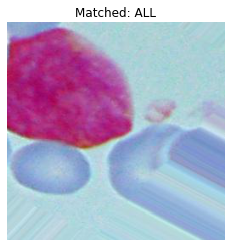

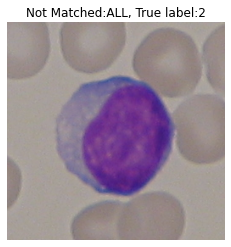

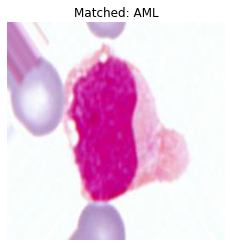

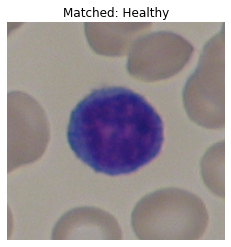

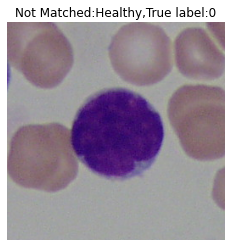

In [ ]:
# Function for displaying images with their predicted Labels from model
import cv2
def display():
  counter=0   # For counting number of matched images
  counter1=0 # For counting number of unmatched images
  for element in range(0,390):
    #image_path = "/content/drive/MyDrive/Data_New/Test/" + test_data.filenames[element]
    #img = cv2.imread(image_path)
    plt.imshow(X_test[element])
    plt.axis("off")
    
    #for element in y_pred[index]:
    if((y_pred_classes[element] == 0) and (y_pred_classes[element]==y_test_classes[element])):
        plt.title("Matched: ALL")
        counter += 1
    elif((y_pred_classes[element] == 1) and (y_pred_classes[element] == y_test_classes[element])):
        plt.title("Matched: AML")
        counter += 1
    elif((y_pred_classes[element] == 2) and (y_pred_classes[element] == y_test_classes[element])):
        plt.title("Matched: Healthy")
        counter +=1
    elif(((y_pred_classes[element] == 0) and (y_pred_classes[element] != y_test_classes[element]))):
      plt.title("Not Matched: Predicted class is ALL, True class:"+str(y_test_classes[element]))
      counter1 += 1
    elif(((y_pred_classes[element] == 1) and (y_pred_classes[element] != y_test_classes[element]))):
      plt.title("Not Matched:AML,True label:"+str(y_test_classes[element]))
      counter1 += 1
    elif((y_pred_classes[element] == 2) and (y_pred_classes[element] != y_test_classes[element])):
      plt.title("Not Matched:Healthy,True label:"+ str(y_test_classes[element]))
      counter1 += 1
    plt.show()

  print("Number of matched images:",counter)
  print("Number of unmatched images:",counter1)


Xception Best: test acc-87%, val acc-99%

In [ ]:
# creating the Conv-Batch Norm block

def conv_bn(x, filters, kernel_size, strides=1):
    
    x = Conv2D(filters=filters, 
               kernel_size = kernel_size, 
               strides=strides, kernel_constraint=max_norm(3.), kernel_initializer = 'he_normal', kernel_regularizer=l2(0.00001),
               padding = 'same', 
               use_bias = False)(x)
    #x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    return x

In [ ]:
# creating separableConv-Batch Norm block

def sep_bn(x, filters, kernel_size, strides=1):
    
    x = SeparableConv2D(filters=filters, 
                        kernel_size = kernel_size, 
                        strides=strides, kernel_constraint=max_norm(3.), kernel_initializer = 'he_normal', kernel_regularizer= l2(0.00001),
                        padding = 'same', 
                        use_bias = False)(x)
    #x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    return x

In [ ]:
# entry flow

def entry_flow(x):
    
    x = conv_bn(x, filters =32, kernel_size =3, strides=2)
    x = ReLU()(x)
    x = conv_bn(x, filters =64, kernel_size =3)
    tensor = ReLU()(x)
    
    x = sep_bn(tensor, filters = 128, kernel_size =3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 128, kernel_size =3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=128, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    
    x = ReLU()(x)
    x = sep_bn(x, filters =256, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters =256, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=256, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    
    x = ReLU()(x)
    x = sep_bn(x, filters =728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters =728, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=728, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    return x

In [ ]:
# middle flow

def middle_flow(tensor):
    
    for _ in range(8):
        x = ReLU()(tensor)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        #x = ReLU()(x)
        tensor = Add()([tensor,x])
        
    return tensor

In [ ]:
# exit flow

def exit_flow(tensor):
    
    x = ReLU()(tensor)
    x = sep_bn(x, filters = 728,  kernel_size=3)
    #x = sep_bn(x, filters = 512,  kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 1024,  kernel_size=3)
    #x = sep_bn(x, filters = 512,  kernel_size=3)
    x = MaxPool2D(pool_size = 3, strides = 2, padding ='same')(x)
    
    tensor = conv_bn(tensor, filters =1024, kernel_size=1, strides =2)
    x = Add()([tensor,x])
    
    x = sep_bn(x, filters = 1536,  kernel_size=3)
    #x = sep_bn(x, filters = 728,  kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 2048,  kernel_size=3)
    x = ReLU()(x)
    x = GlobalAvgPool2D()(x)
    x = Dropout(0.5)(x)
    x = Dense (units = 3, activation = 'softmax')(x)
    
    return x

In [ ]:
# model code

input = Input(shape = (299,299,3))
x = entry_flow(input)
x = middle_flow(x)
output = exit_flow(x)

model = Model (inputs=input, outputs=output)
#model.summary()

In [ ]:
# Define the optimizer
#optimizer = Adam(lr=0.01)
#sgd=SGD(lr=0.0, momentum=0.9)
#opt=RMSprop(lr=0.001,momentum=0.9)
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import LearningRateScheduler
import math

# learning rate schedule
def step_decay(epoch):
  initial_lrate = 0.1
  drop = 0.5
  epochs_drop = 10.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))   # math.floor() method rounds a number DOWN to the nearest integer, if necessary, and returns the result
  return lrate

In [ ]:
lrate = LearningRateScheduler(step_decay,verbose=1) 
#callbacks_list = [lrate] #Creating a list of callbacks

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Model_weights/xception_latest.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=25, verbose=1, mode='auto')

In [ ]:
hist_x1 = model.fit(X1_train,y1_train, steps_per_epoch=80, validation_data=(X1_validation, y1_validation), validation_steps=10,epochs=70,callbacks=[lrate,checkpoint,early])


Epoch 1: LearningRateScheduler setting learning rate to 0.1.
Epoch 1/70
80/80 [==============================] - ETA: 0s - loss: 4.1953 - accuracy: 0.6771
Epoch 1: val_accuracy improved from -inf to 0.33500, saving model to /content/drive/MyDrive/Model_weights/xception_latest.hdf5
80/80 [==============================] - 64s 745ms/step - loss: 4.1953 - accuracy: 0.6771 - val_loss: 954904832.0000 - val_accuracy: 0.3350 - lr: 0.1000

Epoch 2: LearningRateScheduler setting learning rate to 0.1.
Epoch 2/70
80/80 [==============================] - ETA: 0s - loss: 1.6883 - accuracy: 0.7721
Epoch 2: val_accuracy improved from 0.33500 to 0.33667, saving model to /content/drive/MyDrive/Model_weights/xception_latest.hdf5
80/80 [==============================] - 61s 759ms/step - loss: 1.6883 - accuracy: 0.7721 - val_loss: 529665.2500 - val_accuracy: 0.3367 - lr: 0.1000

Epoch 3: LearningRateScheduler setting learning rate to 0.1.
Epoch 3/70
80/80 [==============================] - ETA: 0s - loss

In [ ]:
model_x = load_model('/content/drive/MyDrive/Model_weights/xception_latest.hdf5')

In [ ]:
h = hist_x1.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
model_x.evaluate(X1_test, y1_test)
model_x.evaluate(X1_validation, y1_validation)

19/19 [==============================] - 3s 135ms/step - loss: 0.0960 - accuracy: 0.9933


[0.09598219394683838, 0.9933333396911621]

In [ ]:
y_pred = model_x.predict(X1_test)
y_pred_classes = [np.argmax(element) for element in y_pred] # Selecting highest probability value along axis = 0 i.e. row, to choose that class as label for that image.

              precision    recall  f1-score   support

         ALL       0.80      0.84      0.82       130
         AML       1.00      0.95      0.98       130
     Healthy       0.84      0.83      0.83       130

    accuracy                           0.87       390
   macro avg       0.88      0.87      0.88       390
weighted avg       0.88      0.87      0.88       390



AttributeError: ignored

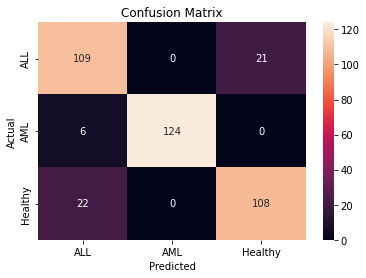

In [ ]:
evaluate_classification_model(y1_test_classes, y_pred_classes)

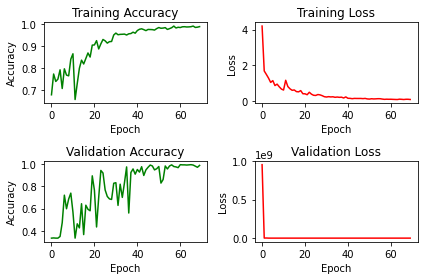

In [ ]:
plot()

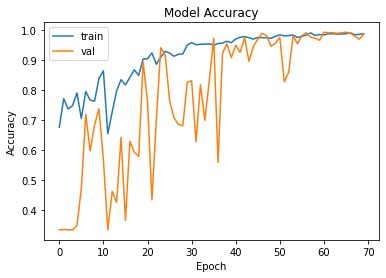

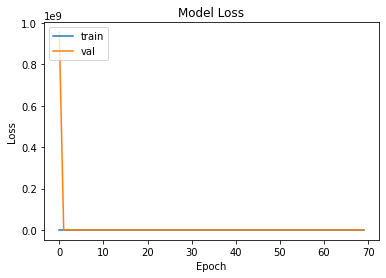

In [ ]:
plot_pair()

In [ ]:
# Displaying test images alongwith their labels and count of matched and unmatched images
display()

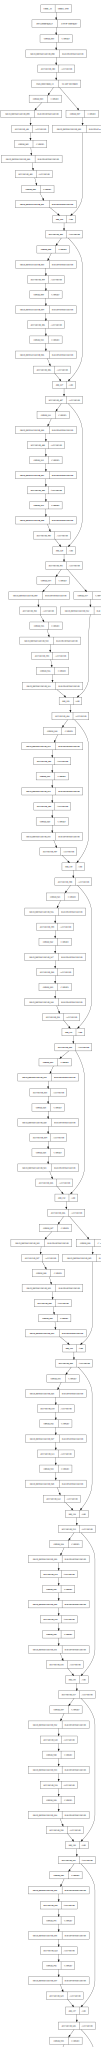

In [ ]:
plot_model(model_x, to_file='flowchart_xception_latest.png')
SVG(model_to_dot(model_x).create(prog='dot', format='svg'))